### Zadanie 1

In [32]:
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlibinline

UsageError: Line magic function `%matplotlibinline` not found.


In [33]:
df=pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [35]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [36]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [37]:
from sklearn.preprocessing import scale
X=pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [38]:
from sklearn.decomposition import PCA
pca_loadings=pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1','V2','V3','V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [39]:
# Fit the PCA model and transform X to get the principal components
pca=PCA()
df_plot=pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


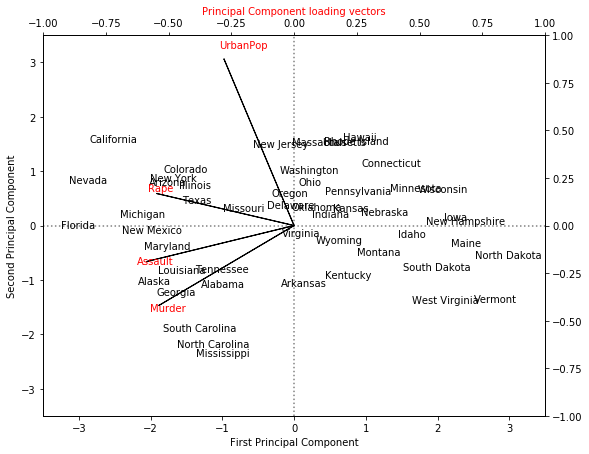

In [40]:
fig , ax1=plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i],-df_plot.PC2.loc[i]), ha='center')
    
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2=ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a=1.07
for i in pca_loadings[['V1','V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a,-pca_loadings.V2.loc[i]*a), color='red')
    
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0],-pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1],-pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2],-pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3],-pca_loadings.V2[3])

In [41]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [42]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x2218b067f48>,
 <a list of 4 Text xticklabel objects>)

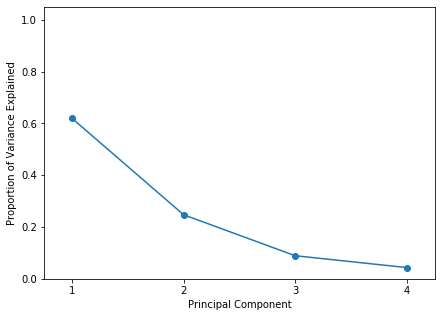

In [43]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_,'-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x2218af5f108>,
 <a list of 4 Text xticklabel objects>)

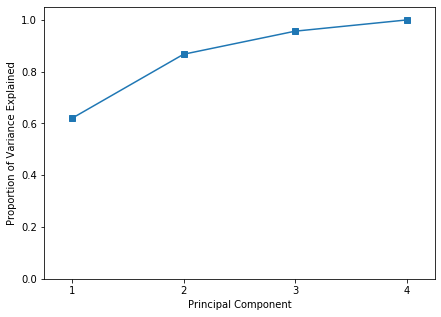

In [44]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_),'-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

In [45]:
df2=pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns=np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [46]:
# Read in the labels to check our work later
y=pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [47]:
# Scale the data
X=pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2=PCA()
df2_plot=pd.DataFrame(pca2.fit_transform(X))

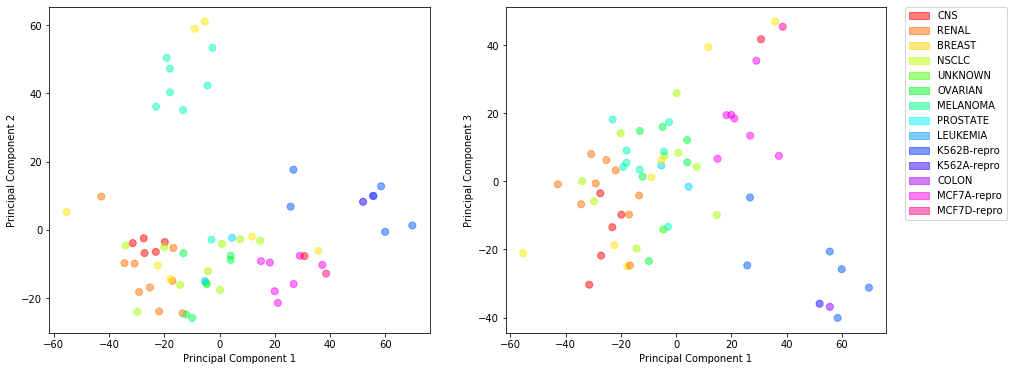

In [48]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,6))
color_idx=pd.factorize(y.type)[0]
cmap=mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5,s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5,s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles=[]
labels=pd.factorize(y.type.unique())
norm=mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    ax2.legend(handles=handles, bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
    
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [49]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).as_matrix(),pca2.explained_variance_ratio_[:5],np.cumsum(pca2.explained_variance_ratio_[:5])],index=['Standard Deviation','Proportion of Variance','Cumulative Proportion'],columns=['PC1','PC2','PC3','PC4','PC5'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

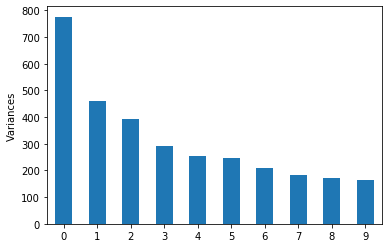

In [50]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

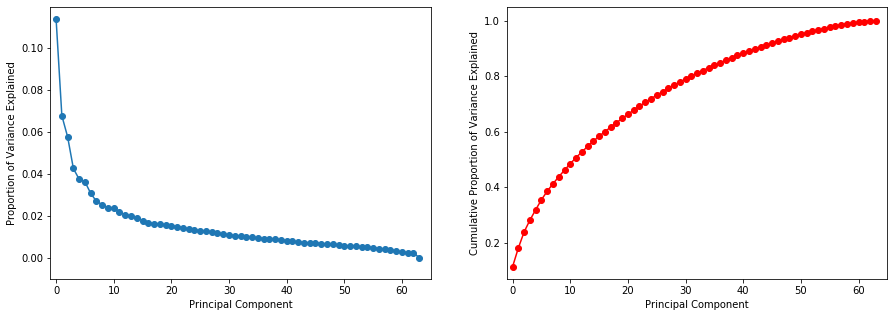

In [51]:
fig , (ax1,ax2)=plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_,'-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_),'-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)

### Zadanie 2

In [52]:
from sklearn.datasets import load_boston

In [53]:
data = load_boston()

In [54]:
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [55]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data['feature_names'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 1. Standaryzacja danych: (convert infs to nans, remove nans, keep only numeric features, scale)

In [59]:
df.dropna(inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [62]:
df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [63]:
df_scaled.var()

CRIM       1.00198
ZN         1.00198
INDUS      1.00198
CHAS       1.00198
NOX        1.00198
RM         1.00198
AGE        1.00198
DIS        1.00198
RAD        1.00198
TAX        1.00198
PTRATIO    1.00198
B          1.00198
LSTAT      1.00198
dtype: float64

#### 1a: Podziel dane na testowe i treningowe (75-25%)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data.target, test_size=.25, random_state=700)

#### 2. Utworzenie macierzy kowariancji

In [65]:
import numpy as np
cov_mrx = np.cov(X_train)

#### 3. Wyznaczenie wektorów własnych macierzy(główne składowe) oraz związane z nimi wartości własnych

In [66]:
values, vectors = np.linalg.eig(cov_mrx)

In [67]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

#### 4. Uszereguj wartości własne w malejącej kolejności

In [68]:
zipped_lists = zip(values, vectors)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
values, vectors = [ list(tuple) for tuple in  tuples]

#### 5. Narysuj wykres współczynników wariancji wyjaśnionej dla wartości własnych

Text(0, 0.5, 'Cumalitive explained variance')

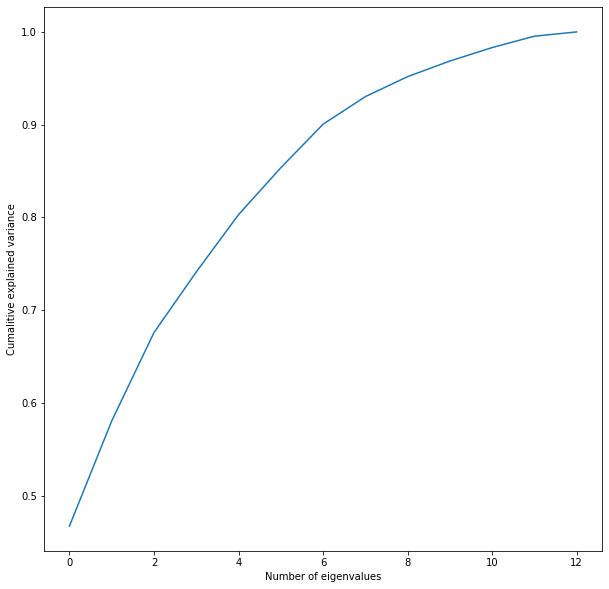

In [70]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of eigenvalues')
plt.ylabel('Cumalitive explained variance')

#### 6. Wybierz k największych wektorów na podstawie sparowanych z nimi wartości własnych

In [72]:
pca =  PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8
0,-1.319547,0.061282,-0.574770,-0.556340,-0.047338,-0.256646,0.318599,0.863931,0.351514
1,1.190163,-1.268857,-0.202494,-1.001994,1.290234,0.175243,-1.066188,1.283814,-0.318057
2,-1.898597,-0.058534,0.083345,-0.191067,-0.312608,0.183661,0.219030,-0.479384,-0.058222
3,-0.919713,1.788304,0.836851,1.172462,-1.889428,0.899852,-0.195160,-0.154831,-0.786517
4,-0.199592,0.046096,-1.396243,-0.514783,0.125579,-0.277795,0.503064,-0.723730,0.104510
